3


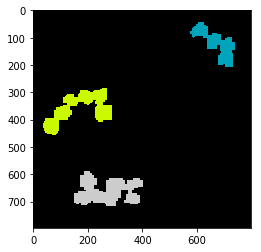

In [10]:
from skimage import io, exposure, color, util, measure, morphology
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

image = color.rgb2gray(io.imread('/Users/mko_san/Downloads/a49b97_ship_map.jpg'))

exposure.equalize_adapthist(image)
Z = util.view_as_windows(image, (5, 5))
Z = Z.reshape(Z.shape[0], Z.shape[1], -1)
variance_map = Z.var(axis=2)

tools_bw = variance_map > 0.000000005
tools_bw = morphology.binary_closing(tools_bw, np.ones((5, 5)))
tools_bw = ndi.binary_fill_holes(tools_bw)


labels = measure.label(tools_bw)
regions = measure.regionprops(labels)
regions = [r for r in regions if r.perimeter > 500 and r.major_axis_length > 200]

print(len(regions))

out = np.zeros_like(tools_bw, dtype=int)
for i, r in enumerate(regions):
    out[labels == r.label] = i + 1

plt.imshow(out, cmap='spectral')
plt.savefig('tools_identified.png', bbox_inches='tight')

plt.show()


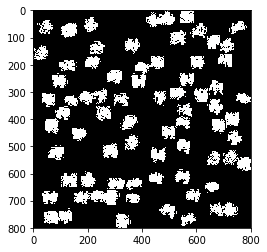

In [4]:
import mahotas as mh
import mahotas.demos
import numpy as np
from pylab import imshow, show

src = '/Users/mko_san/Downloads/a49b97_ship_map.jpg'
f = mahotas.imread(src)
img = np.copy(f)

# Replace places with 3rd coordinate less than 100 with the white-color
# vector [255, 255, 255].
inds = img[:,:,2] > 0
img[inds] = [255,255,255]
f = f[:,:,0]
imshow(img)
show()



In [8]:
fig = mh.gaussian_filter(f, 1.3)
#fig =img
fig = (fig> fig.mean())
labeled, n_nucleus  = mh.label(fig)
print('Found {} ships.'.format(n_nucleus))
sizes = mh.labeled.labeled_size(labeled)
too_small = np.where(sizes < 10)
too_big = np.where(sizes > 60)
labeled = mh.labeled.remove_regions(labeled, too_small)
relabeled, n_left = mh.labeled.relabel(labeled)
print('Found {} ships.'.format(n_left))
labeled = mh.labeled.remove_regions(labeled, too_big)
relabeled2, n_left2 = mh.labeled.relabel(labeled)
print('Found {} ships.'.format(n_left))

Found 78 ships.
Found 76 ships.
Found 76 ships.


Found 78 ships.


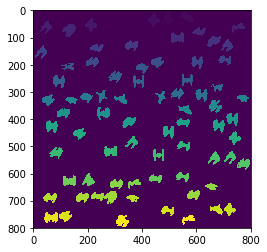

In [200]:
labeled, n_nucleus  = mh.label(fig)
print('Found {} ships.'.format(n_nucleus))
imshow(labeled)
show()

In [ ]:
# Standard imports
import cv2
import numpy as np;
src = '/Users/mko_san/Downloads/a49b97_ship_map.jpg' 
# Read image
im = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)


In [1]:
# Standard imports
import cv2
import numpy as np;
import mahotas

src = '/Users/mko_san/Downloads/a49b97_ship_map.jpg'
f = mahotas.imread(src)


# Replace places with 3rd coordinate less than 100 with the white-color
# vector [255, 255, 255].
inds = f[:,:,2] > 0
f[inds] = [255,255,255]


frame = np.copy(f)

 # Blur image to remove noise
frame=cv2.GaussianBlur(frame, (3, 3), 0)

# Switch image from BGR colorspace to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of purple color in HSV
purpleMin = (0,0,50)
purpleMax = (0, 0, 100)

# Sets pixels to white if in purple range, else will be set to black
mask = cv2.inRange(hsv, purpleMin, purpleMax)


 
#mask = cv2.erode(mask, None, iterations=1)
# commented out erode call, detection more accurate without it

# dilate makes the in range areas larger
#mask = cv2.dilate(mask, None, iterations=1)

# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 256;

# Filter by Area.
params.filterByArea = True
params.minArea = 30

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
reversemask=255-mask
keypoints = detector.detect(reversemask)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(frame, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints)
cv2.imshow("preview", im_with_keypoints)
cv2.waitKey(5)
cv2.destroyAllWindows()

In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import mahotas
import numpy

import matplotlib.pyplot as plt

src = '/Users/mko_san/Downloads/e76fdf_ship_map.jpg'

from PIL import Image

old_im = Image.open(src)
old_size = old_im.size

new_size = (int(old_size[0]*1.1),int(old_size[1]*1.1))
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

image = numpy.array(new_im)
image_gray = rgb2gray(image)

/usr/local/lib/python2.7/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import mahotas
import numpy

import matplotlib.pyplot as plt

src = '/Users/mko_san/Downloads/e76fdf_ship_map.jpg'

from PIL import Image

old_im = Image.open(src)
old_size = old_im.size

new_size = (int(old_size[0]*1.1),int(old_size[1]*1.1))
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

image = numpy.array(new_im) 
#f = mahotas.imread(new_im)
# Replace places with 3rd coordinate less than 100 with the white-color
# vector [255, 255, 255].
#inds = f[:,:,2] > 0
#f[inds] = [255,255,255]

image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, min_sigma=14, max_sigma=30, num_sigma=10, threshold=.07)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
print len(blobs_log)
return
#blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
#blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log]#, blobs_dog, blobs_doh]
colors = ['yellow']#, 'lime', 'red']
titles = ['Laplacian of Gaussian',]# 'Difference of Gaussian',
          #'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, ax = plt.subplots(1, sharex=True, figsize=(50,100))

for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title(title)
    ax.imshow(image, interpolation='nearest')
    print len(blobs)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import mahotas
import numpy

import matplotlib.pyplot as plt

src = '/Users/mko_san/Downloads/e76fdf_ship_map.gif'

from PIL import Image

old_im = Image.open(src)
old_size = old_im.size

new_size = (int(old_size[0]*1.1),int(old_size[1]*1.1))
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

image = numpy.array(new_im)
image_gray = rgb2gray(image)
blobs_log = blob_log(image_gray, min_sigma=14, max_sigma=30, num_sigma=10, threshold=.07)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
print len(blobs_log)

/usr/local/lib/python2.7/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


KeyboardInterrupt: 

In [4]:
def show(image, large=False):
    if large:
        fig, ax = plt.subplots(1, sharex=True, figsize=(8,8), dpi=100)
        ax.imshow(image, interpolation='nearest')
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(1, sharex=True)
        ax.imshow(image, interpolation='nearest')
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()


In [5]:
import cv2
import numpy as np;
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import mahotas
import numpy
from matplotlib import pyplot as plt
src = '/Users/mko_san/Downloads/e76fdf_ship_map.png' 
image = cv2.imread(src)
#kernel = np.ones((5,5),np.float32)/25
#image_d = cv2.filter2D(image,-1,kernel)
#image_max = image_d[:, :, 0]
#show(image_max, large=True)

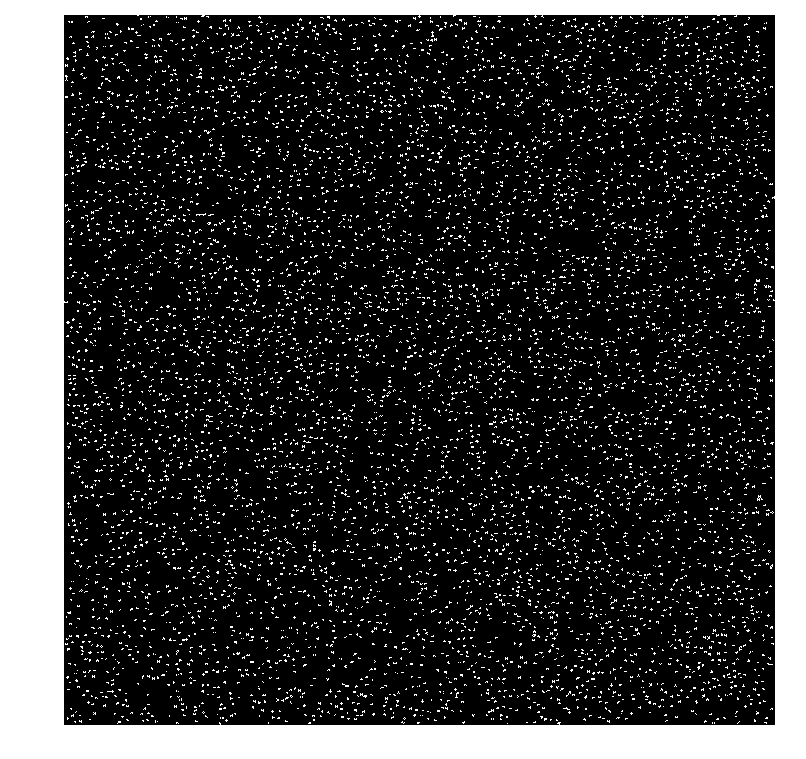

In [6]:
thresh = 20
image_thresh = image.copy()
image_thresh[image_thresh < thresh] = 0
image_thresh[image_thresh >= thresh] = 255
show(image_thresh, large=True)

In [3]:
import cv2
import numpy as np;
import mahotas as mh
from pylab import imshow,imwrite, show as doshow
src = '/Users/mko_san/Downloads/e76fdf_ship_map.png' 
dst = '/Users/mko_san/Downloads/test.png'
image = cv2.imread(src)
#image = cv2.imread(src)
#fig = mh.gaussian_filter(f, 1.3)
fig =image
#fig = (fig> fig.mean())
labeled, n_nucleus  = mh.label(fig)
out_image = labeled.astype(np.uint8)
imwrite(out_image,dst)
print('Found {} ships.'.format(n_nucleus))
sizes = mh.labeled.labeled_size(labeled)
too_small = np.where(sizes < 5)
too_big = np.where(sizes > 40)
labeled = mh.labeled.remove_regions(labeled, too_small)
relabeled, n_left = mh.labeled.relabel(labeled)
print('Found {} ships.'.format(n_left))
labeled = mh.labeled.remove_regions(labeled, too_big)
relabeled2, n_left2 = mh.labeled.relabel(labeled)
print('Found {} ships.'.format(n_left))

ImportError: cannot import name imwrite

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [3]:
import requests, time, StringIO, operator
from PIL import Image

url = 'http://www.python-challenges.com/psb/static/img/star_wars/star_wars.png'
r = requests.get(url)
im = Image.open(StringIO.StringIO(r.content))

colors ={}

for pixel in im.getdata():
    if pixel:
        color_key = pixel
        if color_key  not in colors:
            colors[color_key] = 0
        colors[color_key] += 1

sorted_colors = sorted(colors.items(), key=operator.itemgetter(1))
sorted_colors.reverse()
for color in sorted_colors:
    print color

(81, 210)
(211, 158)
(238, 140)
(223, 130)
(11, 118)
(91, 117)
(44, 100)
(152, 74)
(25, 66)
(94, 54)
(195, 9)
(228, 4)
(15, 3)
